In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas_datareader import data as web
import mplfinance as mpf
import plotly.graph_objects as go

In [6]:
!pip install mplfinance

In [8]:
stock = '^NSEI'#nifty50
data  = web.DataReader(stock, data_source='yahoo', start='01-01-2020')

In [9]:
data 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,12222.200195,12165.299805,12202.150391,12182.500000,304100,12182.500000
2020-01-02,12289.900391,12195.250000,12198.549805,12282.200195,407700,12282.200195
2020-01-03,12265.599609,12191.349609,12261.099609,12226.650391,428800,12226.650391
2020-01-06,12179.099609,11974.200195,12170.599609,11993.049805,396500,11993.049805
2020-01-07,12152.150391,12005.349609,12079.099609,12052.950195,447800,12052.950195
...,...,...,...,...,...,...
2020-11-02,11725.650391,11557.400391,11697.349609,11669.150391,568400,11669.150391
2020-11-03,11836.200195,11723.299805,11734.450195,11813.500000,674300,11813.500000
2020-11-04,11929.650391,11756.400391,11783.349609,11908.500000,667300,11908.500000


C:\Users\Lenovo\Anaconda3\anaconda\lib\site-packages\mplfinance\plotting.py:70: DeprecationWarning: 


     Default value is now `no_xgaps=True`
     However, to set `no_xgaps=False` and silence this warning,
     use instead: `show_nontrading=True`.

  category=DeprecationWarning)


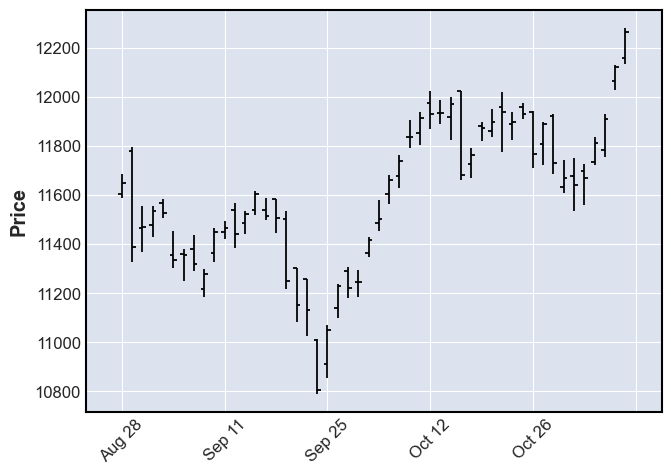

In [12]:
mpf.plot(data[-50:], no_xgaps = True)
plt.show()

C:\Users\Lenovo\Anaconda3\anaconda\lib\site-packages\mplfinance\plotting.py:70: DeprecationWarning: 


     Default value is now `no_xgaps=True`
     However, to set `no_xgaps=False` and silence this warning,
     use instead: `show_nontrading=True`.

  category=DeprecationWarning)


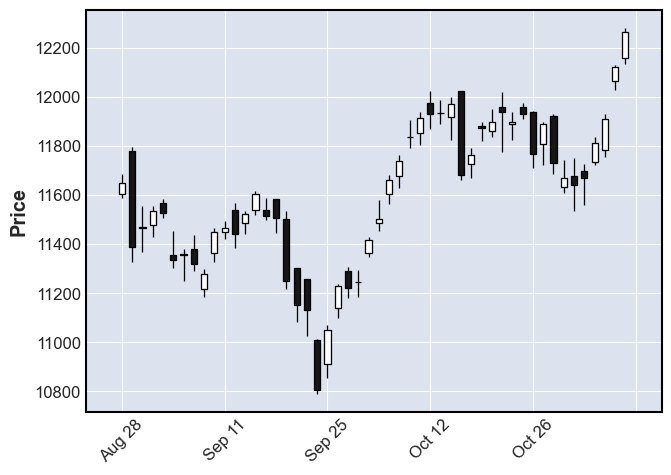

In [13]:
mpf.plot(data[-50:], type='candlestick', no_xgaps = True)
plt.show()

In [14]:
# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
pdates = mdates.date2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]


AttributeError: module 'mplfinance' has no attribute 'plot_day_summary_ohlc'

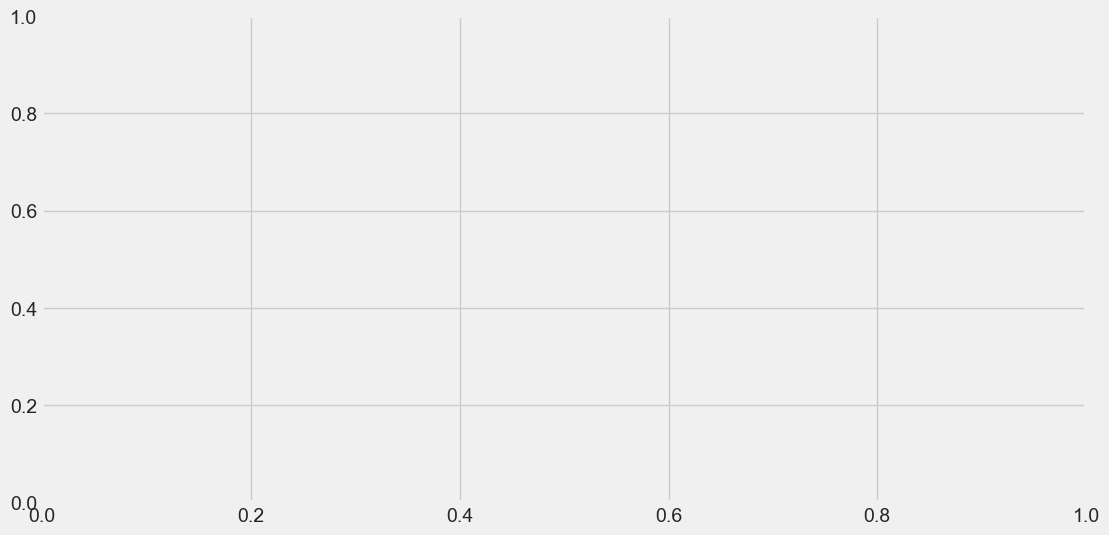

In [15]:
# We can now feed the ohlc matrix into mpl-finance to create a candle stick chart:

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mpf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price (Rs)')
ax.set_title('NIFTY50 - Bar Chart')

# Choosing to display the dates as "Month Day":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# This is to automatically arrange the date labels in a readable way:
fig.autofmt_xdate()

plt.show() 

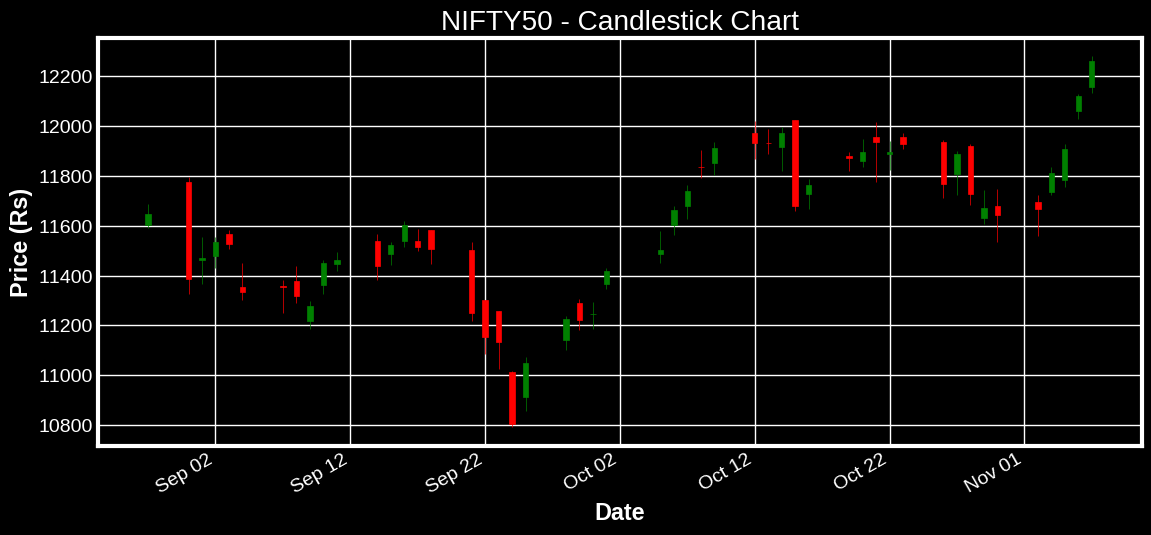

In [37]:
fig, ax = plt.subplots(figsize = (12,6))

mpf.candlestick_ohlc(ax, ohlc[-50:], width=0.4,colorup='g', colordown='r')
ax.set_xlabel('Date')
ax.set_ylabel('Price (Rs)')
ax.set_title('NIFTY50 - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.style.use('dark_background') 
fig.autofmt_xdate()
plt.show() 


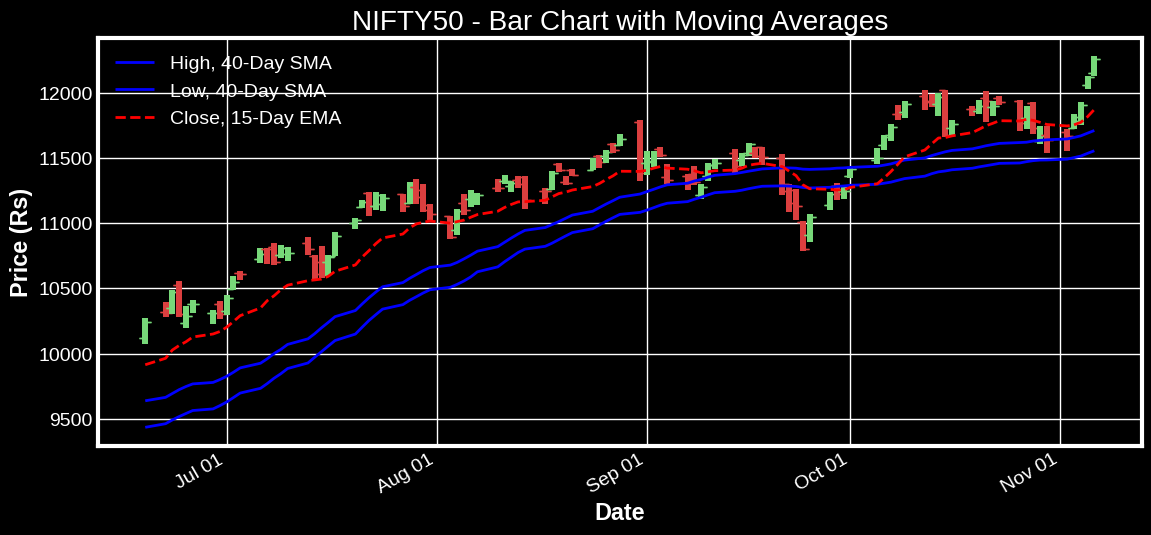

In [36]:
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(span=15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mpf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')
plt.style.use('dark_background') 
ax.set_xlabel('Date')
ax.set_ylabel('Price (Rs)')
ax.set_title('NIFTY50 - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()
plt.show() 

In [49]:
df=data
fig = go.Figure(data=[go.Candlestick(x=df.index,
open=df['Open'],
high=df['High'],
low=df['Low'],
close=df['Close'],
increasing_line_color='green',
decreasing_line_color = 'red'
)])
fig.show()